<a href="https://colab.research.google.com/github/ShivprasadWaghmare/09_feb.oops_assignment/blob/main/House_price__predictions_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Step -1 : Importing the dependicies


In [1]:
import numpy as np                 # to making arrays
import pandas as pd                # to making dataframe
import matplotlib.pyplot as plt    # Creating plot & graphs.
import seaborn as sns              # graphs
import sklearn.datasets            # to get dataset  and lot of M.L Algorithm
from sklearn.model_selection import train_test_split  # to split our original data into training data and text data.
from xgboost import XGBRegressor
from sklearn import metrics   # to evaluating the model.

# Step- 2 : Importing booston house price  dataset


In [3]:
house_price_dataset = sklearn.datasets.load_breast_cancer()

In [4]:
print(house_price_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [5]:
house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns=house_price_dataset.feature_names) # Loading the dataset into pandas dataframe

In [6]:
house_price_dataframe.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
house_price_dataframe['price'] = house_price_dataset.target

In [8]:
house_price_dataframe.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,price
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [9]:
house_price_dataframe.shape # to know rows and columns in table.

(569, 31)

In [10]:
house_price_dataframe.isnull().sum() # to find missing values in dataset.

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [11]:
house_price_dataframe.describe() #to know the value about desciptive statistics.

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,price
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [12]:
Correlation = house_price_dataframe.corr() # ther are two types of Correlation : #1.Positive: one variable increase other also increase
                                                                                 #2.Negative :one increase other decrease.

In [13]:
# Constructing a heatmap to understand the correlation.

<Axes: >

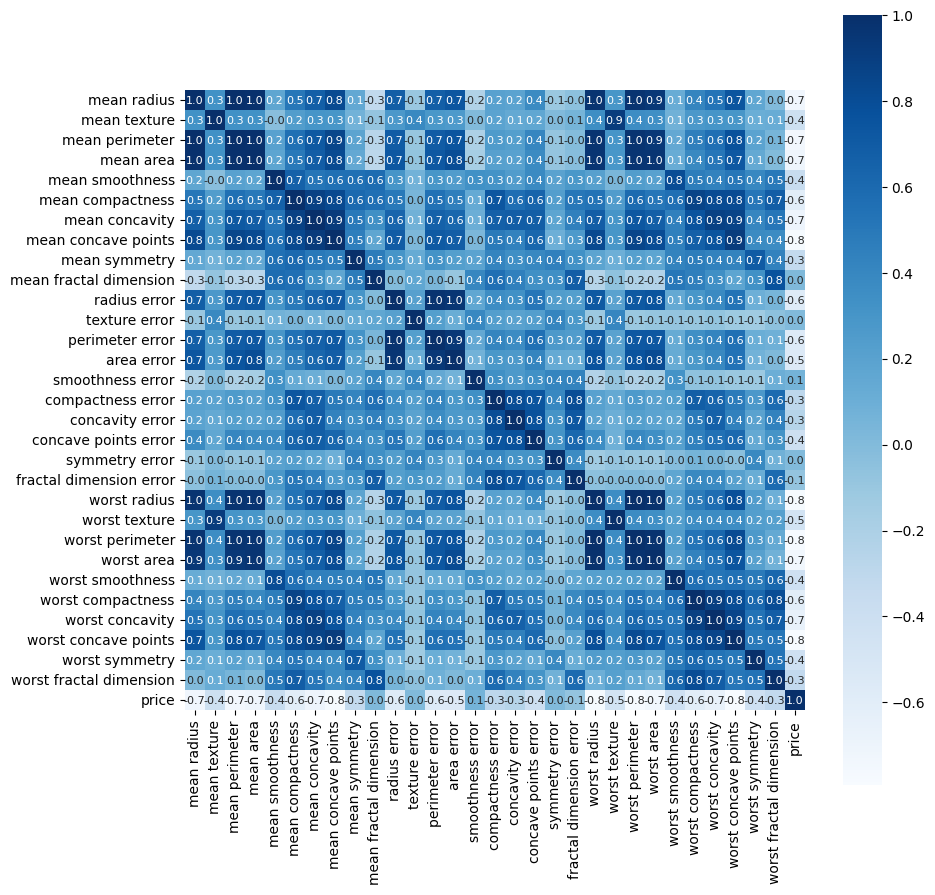

In [14]:
plt.figure(figsize =(10,10))
sns.heatmap(Correlation, cbar=True, square=True, fmt='.1f', annot= True, annot_kws={'size':8},cmap='Blues') ## c bar means colour bar in side,square= all values in square,
# fmt means float values after one place. # annot means annotations present in left side(feature_name) and 8 is size,cmap = colour of heatmap

In [15]:
# Spliting  the data and target(price)

In [17]:
x= house_price_dataframe.drop(['price'], axis=1)# present all the data.
y = house_price_dataframe['price'] # present all the price.

In [ ]:
print(x)
print(y)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

Spliting data into training and test data

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state = 2)

In [19]:
print(x.shape,x_train.shape,x_test.shape)

(569, 30) (455, 30) (114, 30)


# Step 03 : Model Training

In [20]:
# xGBooster regressior: # decision tree based model and it is enemble based model means more than one model

In [21]:
# Loading the model
model = XGBRegressor()


In [22]:
# training the model with X_Train
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [23]:
# Evaluation of the model:

## Prediction on training data.

In [25]:
# Accuracy  for prediction on training data
training_data_prediction = model.predict(x_train)

In [31]:
# Accuracy  for prediction on training data
test_data_prediction = model.predict(x_train)

In [26]:
print(training_data_prediction)

[ 9.98798490e-01  1.00000918e+00  5.84045483e-06 -4.78222209e-04
  3.31544114e-04  9.99700546e-01  9.99906600e-01 -2.94355239e-04
  9.98732626e-01  9.99758840e-01 -4.36909468e-04  2.93647579e-04
  9.99948323e-01 -1.16051589e-04  9.99575913e-01  1.00012875e+00
  1.15893176e-03 -1.14468066e-05  1.00015867e+00 -1.17344061e-04
  1.89854734e-04  1.00003576e+00  9.99920666e-01  9.99928713e-01
  9.99974847e-01  9.99889195e-01  9.99641359e-01  9.99791503e-01
  9.99315023e-01 -9.86071900e-05  7.82746414e-04  9.99995172e-01
  1.00004935e+00  9.99921918e-01  4.79858863e-04  1.00019729e+00
  9.99920189e-01  2.06218028e-05  3.82222461e-05  5.62487345e-04
  1.00001240e+00  1.00032008e+00  3.66129134e-05  1.00009835e+00
  9.99516666e-01  9.99995172e-01  9.99741733e-01 -5.31703081e-05
 -2.65931827e-04  9.99985397e-01  9.99888182e-01  9.99827504e-01
 -5.67307252e-05 -1.69013219e-04  9.99985397e-01  9.99698162e-01
  9.99041140e-01  9.99978900e-01  1.00025606e+00  1.00060463e+00
 -1.44663907e-04  9.99920

In [27]:
# R Squared error
score_1 = metrics.r2_score(y_train,training_data_prediction)

In [28]:
# Mean absolute error
score_2 = metrics.mean_absolute_error(y_train,training_data_prediction)

In [29]:
print('R squared error : ',score_1)
print('Mean absolute error :',score_2) # lesser the value the accurate the model

R squared error :  0.9999988079071045
Mean absolute error : 0.0002934650401584804


# Visualizing the actually price and predicted price of house (Last step)

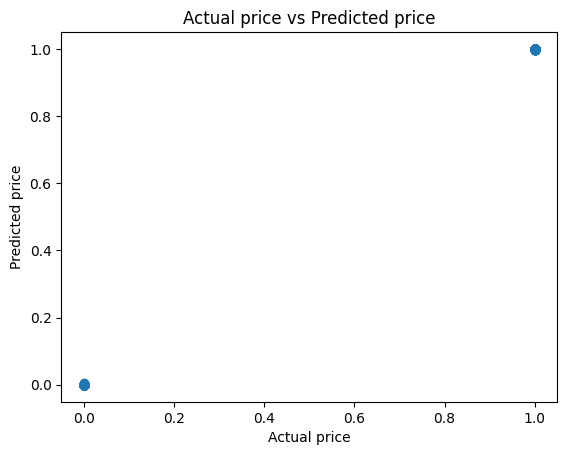

In [33]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price vs Predicted price')
plt.show()

# Prediction on test data

In [32]:
# R Squared error
score_1 = metrics.r2_score(y_test,test_data_prediction)
# Mean absolute error
score_2 = metrics.mean_absolute_error(y_test,test_data_prediction)
print('R squared error : ',score_1)
print('Mean absolute error :',score_2)

ValueError: Found input variables with inconsistent numbers of samples: [114, 455]